# **SUBMISSION DICODING Machine Learning Pemula** 

## Data Diri
*   Nama Lengkap : Dewi Chayanti
*   E-mail       : Dewichay04@gmail.com
*   Kota         : Palembang, Sumatera Selatan

Mengimport package yang di butuhkan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

Mendownload terlebih dahulu dataset rockpaperscissor

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-05 08:57:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.06MB/s    in 64s     

2020-11-05 08:58:26 (4.79 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Callback untuk menghentikan training ketika akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.99):
      print("\nAkurasi telah mencapai 99%, trainingdihentikan!!")
      self.model.stop_training = True

callbacks = myCallback()

Mengekstraksi pada file zip dataset rockpaperscissor

In [4]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
#melihat jumlah gambar pada directori rock
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [6]:
#melihat jumlah gambar pada directory scissor
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [7]:
#melihat jumlah gambar pada directory paper
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

Memecah setiap data  dalam directory menjadi data train 

In [8]:
#membuat nama directori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')


In [9]:
# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [10]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [11]:
# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [12]:
#training directory
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#validation directory
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directory baru di dalam directory training dan validation
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)

if not os.path.exists(val_paper):
  os.mkdir(val_paper)

if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)


In [13]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [14]:
print('total rock train image :',len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print('total rock val image   :',len(os.listdir('/tmp/rockpaperscissors/val/rock')))

total rock train image : 435
total rock val image   : 291


In [15]:
print('total scissors train image :',len(os.listdir('/tmp/rockpaperscissors/train/scissors')))
print('total scissors val image   :',len(os.listdir('/tmp/rockpaperscissors/val/scissors')))

total scissors train image : 450
total scissors val image   : 300


In [16]:
print('total paper train image :',len(os.listdir('/tmp/rockpaperscissors/train/paper')))
print('total paper val image :',len(os.listdir('/tmp/rockpaperscissors/val/paper')))

total paper train image : 427
total paper val image : 285


In [17]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [18]:
train_generator = train_datagen.flow_from_directory(
                                                       train_dir,
                                                       target_size =(150,150),
                                                       batch_size = 32,
                                                       class_mode = 'categorical'
                                                    )

validation_generator = test_datagen.flow_from_directory(
                                                            validation_dir,
                                                            target_size = (150,150),
                                                            batch_size = 32,
                                                            class_mode = 'categorical'
                                                        )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [19]:
# membuat model sequeltial
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  #menggunakan activation ='softmax' untuk klasifikasi 3 kelas
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [20]:
#menambah optimizer dan loss dengan menggunakan 'categorical _crossenttopy'
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
#Training Model
history = model.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 20,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/30
30/30 - 11s - loss: 1.0891 - accuracy: 0.4313 - val_loss: 0.9432 - val_accuracy: 0.5406
Epoch 2/30
30/30 - 11s - loss: 0.5473 - accuracy: 0.7885 - val_loss: 0.3567 - val_accuracy: 0.8953
Epoch 3/30
30/30 - 11s - loss: 0.3145 - accuracy: 0.8854 - val_loss: 0.2742 - val_accuracy: 0.9125
Epoch 4/30
30/30 - 11s - loss: 0.2557 - accuracy: 0.9104 - val_loss: 0.2999 - val_accuracy: 0.8844
Epoch 5/30
30/30 - 11s - loss: 0.1669 - accuracy: 0.9500 - val_loss: 0.1594 - val_accuracy: 0.9531
Epoch 6/30
30/30 - 11s - loss: 0.1684 - accuracy: 0.9510 - val_loss: 0.1482 - val_accuracy: 0.9578
Epoch 7/30
30/30 - 11s - loss: 0.1281 - accuracy: 0.9583 - val_loss: 0.1346 - val_accuracy: 0.9609
Epoch 8/30
30/30 - 11s - loss: 0.1152 - accuracy: 0.9573 - val_loss: 0.0854 - val_accuracy: 0.9719
Epoch 9/30
30/30 - 11s - loss: 0.1022 - accuracy: 0.9740 - val_loss: 0.1594 - val_accuracy: 0.9453
Epoch 10/30
30/30 - 11s - loss: 0.0920 - accuracy: 0.9750 - val_loss: 0.0805 - val_accuracy: 0.9688
Epoch 11/

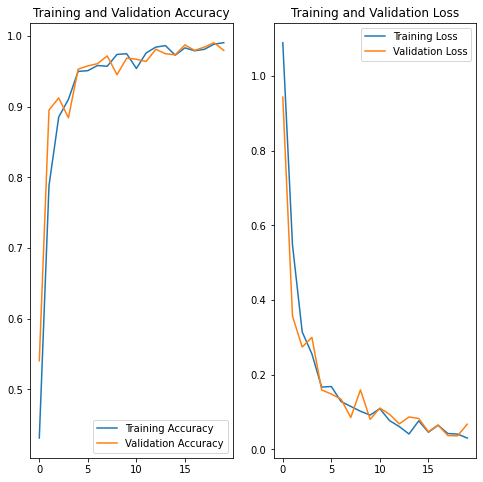

In [22]:
# melakukan plotting untuk melihat validasi pada akurasi dan loss

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Menginput image untuk Classifier menggunakan dataset saya sendiri. mengklasifikasi apakah image itu rock,paper dan scissor.

Saving WhatsApp Image 2020-11-05 at 2.56.53 PM (1).jpeg to WhatsApp Image 2020-11-05 at 2.56.53 PM (1).jpeg
WhatsApp Image 2020-11-05 at 2.56.53 PM (1).jpeg
paper


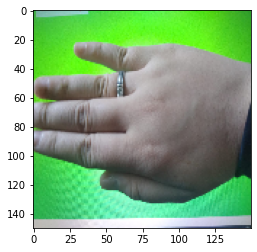

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')